In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence
from interpolacao.linear_partes import interpolacao_linear_partes

In [ ]:

def plot_interpolacao_linear(
        x_valores: Sequence[float],
        y_valores: Sequence[float],
        x: float = None
    ) -> tuple[plt.figure, plt.axes]:
    """
    Plota a interpolação linear por partes entre um conjunto de pontos em R².

    A função conecta cada par consecutivo de pontos (xᵢ, yᵢ) por segmentos de reta,
    exibindo a interpolação linear por partes. Opcionalmente, pode destacar o ponto
    interpolado correspondente a um valor específico de 'x'.

    Args:
        x_valores (Sequence[float]): 
            Valores da variável independente.
        y_valores (Sequence[float]): 
            Valores correspondentes da variável dependente.
        x (float, optional): 
            Valor da variável independente onde se deseja destacar o ponto interpolado.
            Caso não seja fornecido, o gráfico exibirá apenas a interpolação.

    Returns:
        Tuple[plt.Figure, plt.Axes]:
            Um par contendo:
              - 'Figure': objeto da figura criada;
              - 'Axes': objeto dos eixos do gráfico.

    Raises:
        ValueError: 
            - Se as listas 'x_valores' e 'y_valores' tiverem comprimentos diferentes.
            - Se houver menos de dois pontos para interpolar.
            - Se 'x' estiver fora do intervalo de 'x_valores'.
    """

    pontos = sorted(zip(x_valores, y_valores), key = lambda p: p[0])
    x_sorted, y_sorted = zip(*pontos)

    fig, ax = plt.subplots()
    x_vals = np.linspace(x_sorted[0], x_sorted[-1], 100)
    y_vals = [interpolacao_linear_partes(x_sorted, y_sorted, val) for val in x_vals]

    plt.plot(x_vals, y_vals, 'k--', label='Interpolação linear por partes')
    plt.scatter(x_sorted, y_sorted, color='red', label='Pontos dados')

    if x is not None:
        y_interp = interpolacao_linear_partes(x_sorted, y_sorted, x)
        p_interpolado = np.array([x, y_interp])

        plt.scatter(*p_interpolado, color='green', label=f'Interpolado (x={x:.2f})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Interpolação Linear por Partes')
    plt.grid(True)
    plt.show()

    return fig, ax



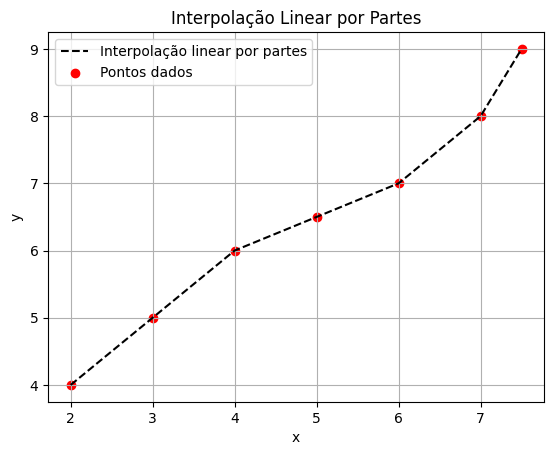

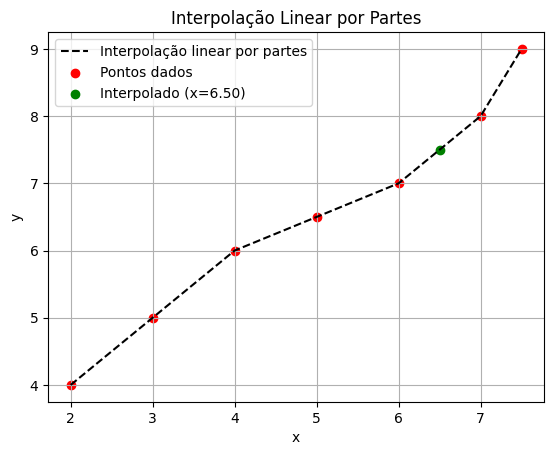

In [62]:
x_vals = [2, 3, 4, 6, 7.5, 5, 7]
y_vals = [4, 5, 6, 7, 9, 6.5, 8]

plot = plot_interpolacao_linear(x_vals, y_vals)

plot2 = plot_interpolacao_linear(x_vals, y_vals, 6.5)



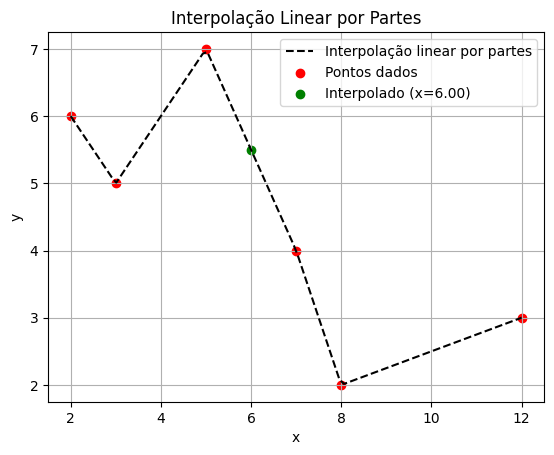

In [63]:
x_vals = [8, 3, 5, 7, 2, 12]
y_vals = [2, 5, 7, 4, 6, 3]

plot = plot_interpolacao_linear(x_vals, y_vals, 6)